<a href="https://colab.research.google.com/github/thaais-souza/AmigoSecreto/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


Organizando o codigo para análise

In [5]:
import matplotlib.pyplot as plt

In [10]:
# Adicionar coluna de identificação
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'
 # Unir todas as lojas
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

#1. Análise do faturamento


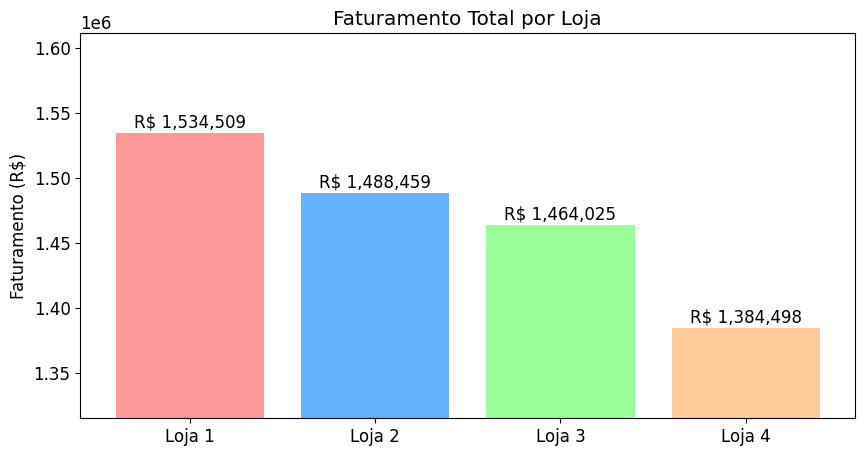

In [24]:
faturamento = todas_lojas.groupby('Loja')['Preço'].sum()
plt.figure(figsize=(10, 5))
bars = plt.bar(faturamento.index, faturamento.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'R$ {height:,.0f}', ha='center', va='bottom')

plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
# Ajustar escala para destacar diferenças
min_val = faturamento.min() * 0.95  # 5% abaixo do valor mínimo
max_val = faturamento.max() * 1.05  # 5% acima do valor máximo
plt.ylim(min_val, max_val)
plt.show()


# 2. Vendas por Categoria


In [29]:
print("VENDAS POR CATEGORIA:")
print("=" * 30)
vendas_categoria = todas_lojas['Categoria do Produto'].value_counts()
for categoria, quantidade in vendas_categoria.items():
    print(f"{categoria}: {quantidade} vendas")
print()

VENDAS POR CATEGORIA:
moveis: 1886 vendas
eletronicos: 1772 vendas
brinquedos: 1290 vendas
eletrodomesticos: 1149 vendas
esporte e lazer: 1113 vendas
instrumentos musicais: 753 vendas
livros: 742 vendas
utilidades domesticas: 730 vendas



# 3. Média de Avaliação das Lojas

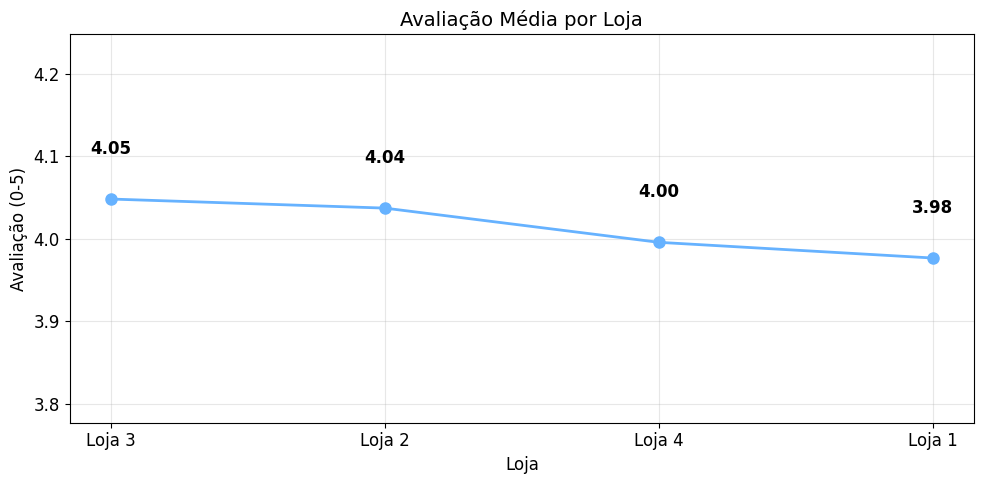

In [27]:
# Gráfico de Linha para Avaliação Média por Loja
avaliacao = todas_lojas.groupby('Loja')['Avaliação da compra'].mean()
plt.figure(figsize=(10, 5))

# Ordenar as lojas para melhor visualização
avaliacao = avaliacao.sort_values(ascending=False)

# Criar o gráfico de linha
plt.plot(avaliacao.index, avaliacao.values, marker='o', linewidth=2, markersize=8, color='#66B2FF')

# Adicionar valores nos pontos
for i, valor in enumerate(avaliacao.values):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

plt.title('Avaliação Média por Loja', fontsize=14)
plt.ylabel('Avaliação (0-5)', fontsize=12)
plt.xlabel('Loja', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajustar escala para destacar diferenças
min_val = avaliacao.min() - 0.2
max_val = avaliacao.max() + 0.2
plt.ylim(min_val, max_val)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [30]:
print("TOP 5 PRODUTOS MAIS VENDIDOS:")
print("=" * 30)
produtos_mais_vendidos = todas_lojas['Produto'].value_counts().head(5)
for produto, quantidade in produtos_mais_vendidos.items():
    print(f"{produto}: {quantidade} vendas")
print()

TOP 5 PRODUTOS MAIS VENDIDOS:
Cômoda: 210 vendas
Carrinho controle remoto: 206 vendas
Micro-ondas: 206 vendas
Bateria: 203 vendas
Cama king: 201 vendas



In [31]:
print("TOP 5 PRODUTOS MENOS VENDIDOS:")
print("=" * 30)
produtos_menos_vendidos = todas_lojas['Produto'].value_counts().tail(5)
for produto, quantidade in produtos_menos_vendidos.items():
    print(f"{produto}: {quantidade} vendas")
print()


TOP 5 PRODUTOS MENOS VENDIDOS:
Ciência de dados com python: 166 vendas
Guitarra: 165 vendas
Mochila: 163 vendas
Headset: 158 vendas
Celular ABXY: 157 vendas



# 5. Frete Médio por Loja


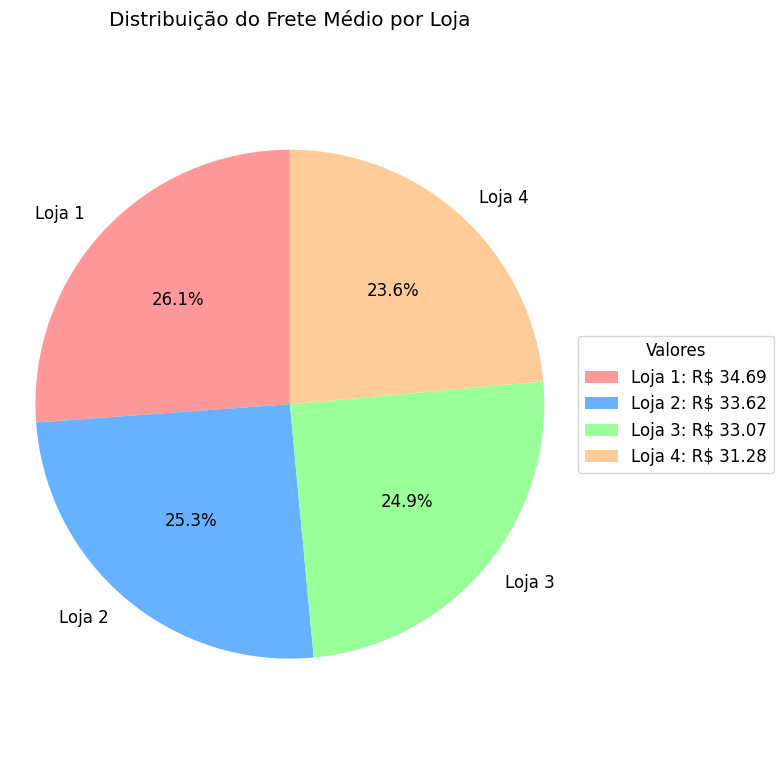

In [28]:
# Gráfico de Pizza para Frete Médio por Loja
frete_medio = todas_lojas.groupby('Loja')['Frete'].mean()
plt.figure(figsize=(8, 8))
cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Criar o gráfico de pizza
plt.pie(frete_medio.values, labels=frete_medio.index, autopct='%1.1f%%',
        startangle=90, colors=cores)
plt.title('Distribuição do Frete Médio por Loja')

# Adicionar legenda com os valores exatos
legenda = [f'{loja}: R$ {valor:.2f}' for loja, valor in zip(frete_medio.index, frete_medio.values)]
plt.legend(legenda, title="Valores", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

## **6. Cálculo de Eficiência**

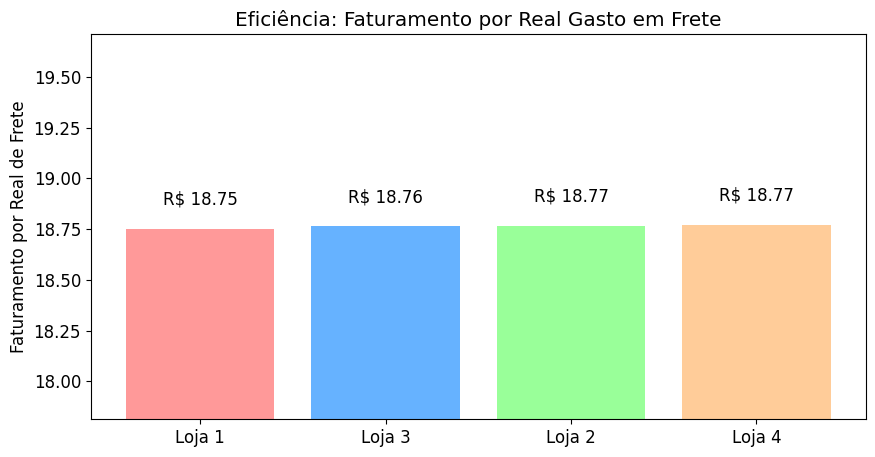

ANÁLISE DE EFICIÊNCIA:
Loja 1: R$18.75 de faturamento por real gasto em frete
Loja 3: R$18.76 de faturamento por real gasto em frete
Loja 2: R$18.77 de faturamento por real gasto em frete
Loja 4: R$18.77 de faturamento por real gasto em frete

RECOMENDAÇÃO FINAL:
A loja com menor eficiência é a Loja 1
Justificativa: Esta loja apresenta o menor retorno financeiro em relação
aos custos de frete, indicando que os gastos com entrega não estão sendo
adequadamente compensados pelo faturamento gerado.


In [34]:
frete_total = todas_lojas.groupby('Loja')['Frete'].sum()
eficiencia = faturamento / frete_total
eficiencia = eficiencia.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
bars = plt.bar(eficiencia.index, eficiencia.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'R$ {height:.2f}', ha='center', va='bottom')

plt.title('Eficiência: Faturamento por Real Gasto em Frete')
plt.ylabel('Faturamento por Real de Frete')
# Ajustar escala para destacar diferenças
min_val = eficiencia.min() * 0.95  # 5% abaixo do valor mínimo
max_val = eficiencia.max() * 1.05  # 5% acima do valor máximo
plt.ylim(min_val, max_val)
plt.show()

# Recomendação Final
print("ANÁLISE DE EFICIÊNCIA:")
print("=" * 30)
for loja, eff in eficiencia.items():
    print(f"{loja}: R${eff:.2f} de faturamento por real gasto em frete")

print("\nRECOMENDAÇÃO FINAL:")
print("=" * 30)
print(f"A loja com menor eficiência é a {eficiencia.index[0]}")
print("Justificativa: Esta loja apresenta o menor retorno financeiro em relação")
print("aos custos de frete, indicando que os gastos com entrega não estão sendo")
print("adequadamente compensados pelo faturamento gerado.")